# **Hierarchical Clustering**
## **Klasteryzacja hierarchiczna**

---

### **Overview / Przegląd**

Hierarchical clustering creates a tree of clusters by either merging (agglomerative) or splitting (divisive) clusters. The most common approach is agglomerative clustering, which starts with each point as its own cluster and progressively merges the closest clusters.

Klasteryzacja hierarchiczna tworzy drzewo klastrów poprzez łączenie (aglomeracyjne) lub dzielenie (dywizyjne) klastrów. Najczęstszym podejściem jest klasteryzacja aglomeracyjna, która rozpoczyna z każdym punktem jako własnym klastrem i stopniowo łączy najbliższe klastry.

### **Types / Typy**
1. **Agglomerative (Bottom-up)** - starts with individual points / zaczyna od pojedynczych punktów
2. **Divisive (Top-down)** - starts with all points in one cluster / zaczyna od wszystkich punktów w jednym klastrze

### **Linkage Criteria / Kryteria łączenia**
- **Single Linkage**: Minimum distance between clusters / Minimalna odległość między klastrami
- **Complete Linkage**: Maximum distance between clusters / Maksymalna odległość między klastrami  
- **Average Linkage**: Average distance between all pairs / Średnia odległość między wszystkimi parami
- **Ward Linkage**: Minimizes within-cluster variance / Minimalizuje wariancję wewnątrz klastra


In [1]:
# Import required libraries / Importowanie wymaganych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris, load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Set style for plots / Ustawienie stylu wykresów
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully / Biblioteki zaimportowane pomyślnie")


Libraries imported successfully / Biblioteki zaimportowane pomyślnie


Dataset shape / Kształt zbioru danych: (150, 2)
True number of clusters / Prawdziwa liczba klastrów: 3


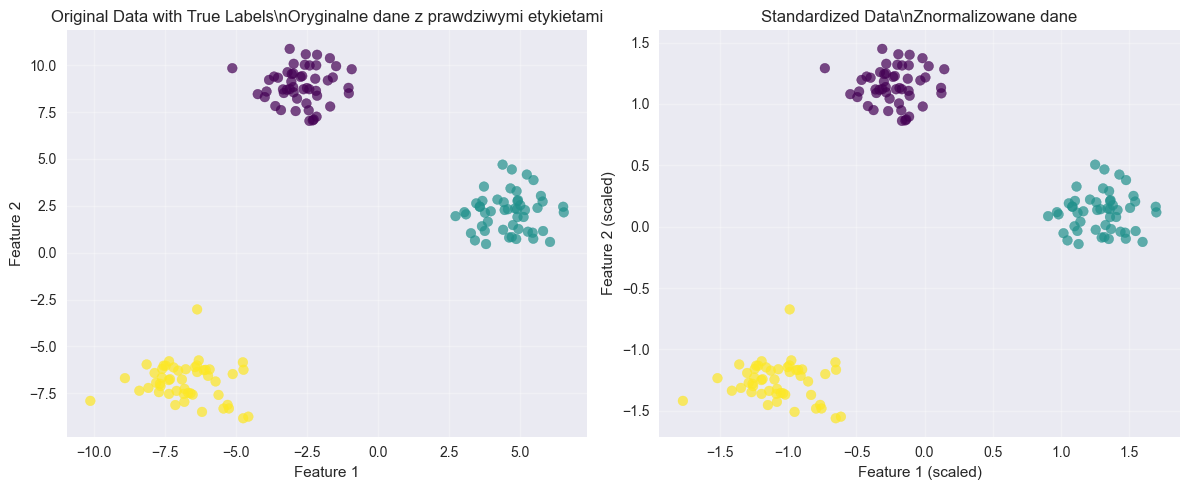

In [2]:
# Create sample dataset / Tworzenie przykładowego zbioru danych
np.random.seed(42)
X_sample, y_true = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)

# Standardize the data / Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

print(f"Dataset shape / Kształt zbioru danych: {X_sample.shape}")
print(f"True number of clusters / Prawdziwa liczba klastrów: {len(np.unique(y_true))}")

# Visualize original data / Wizualizacja oryginalnych danych
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('Original Data with True Labels\\nOryginalne dane z prawdziwymi etykietami')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('Standardized Data\\nZnormalizowane dane')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


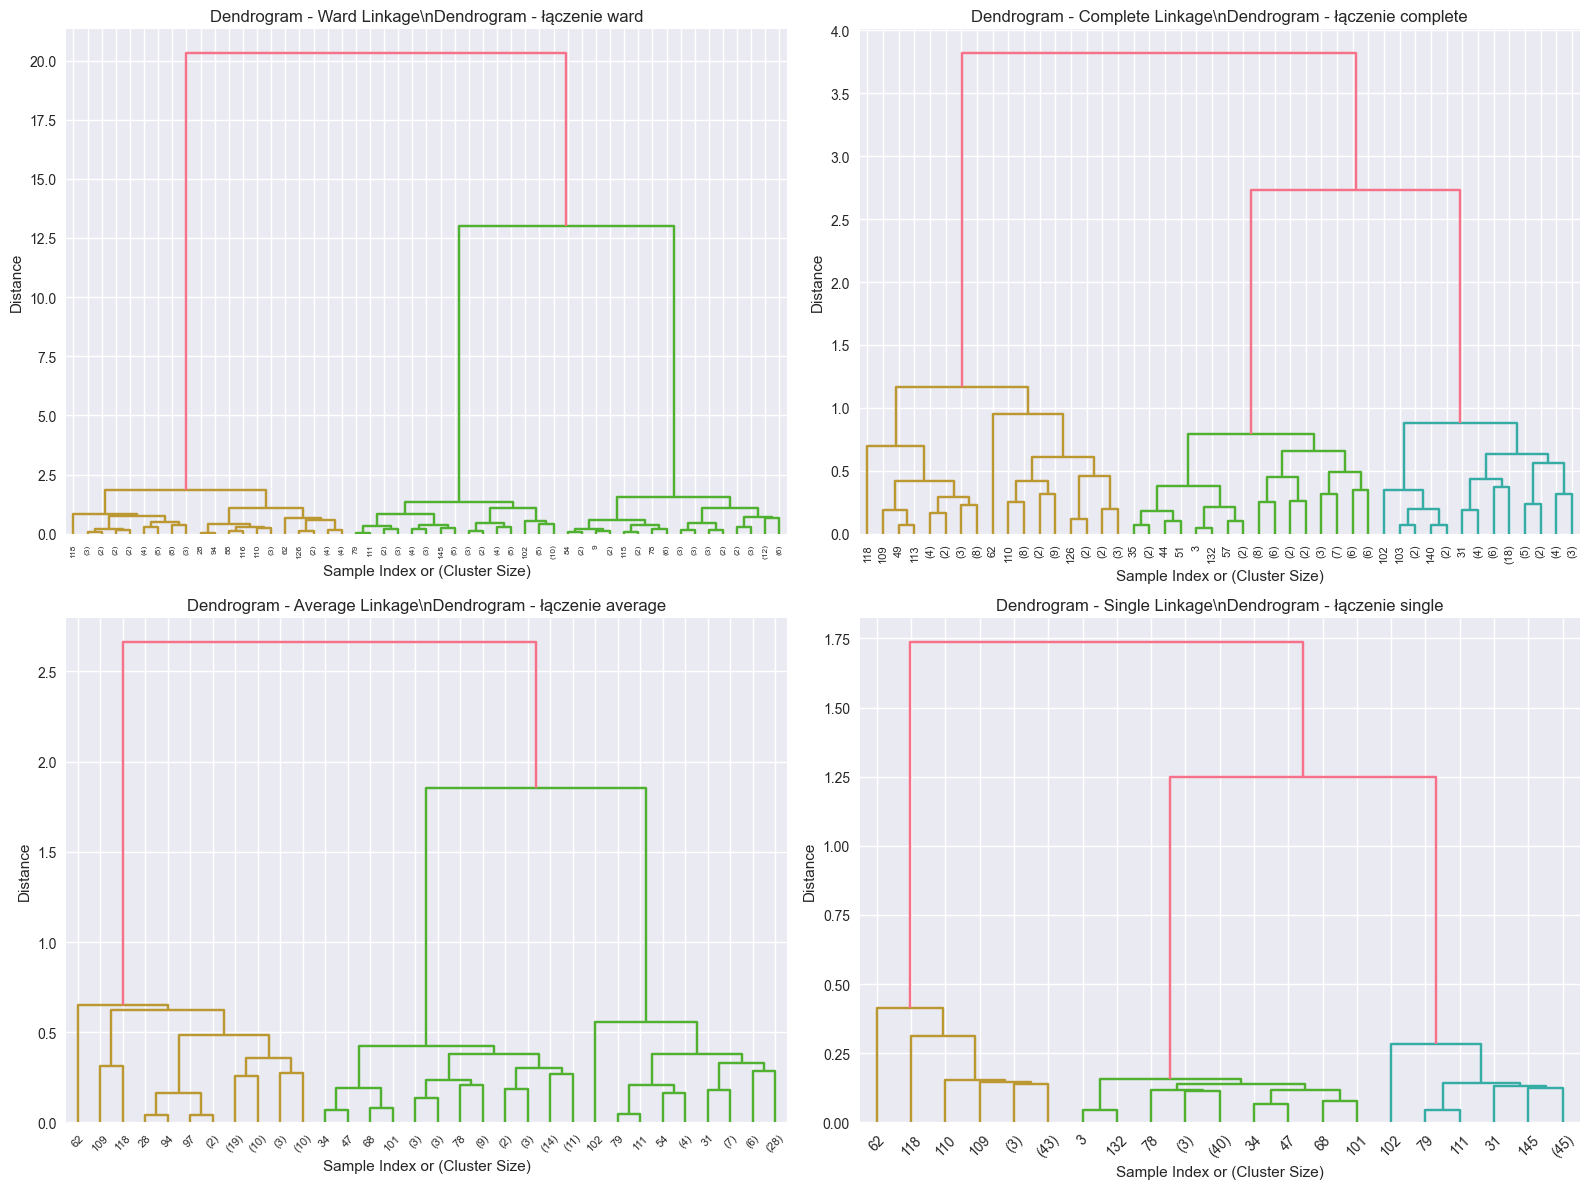

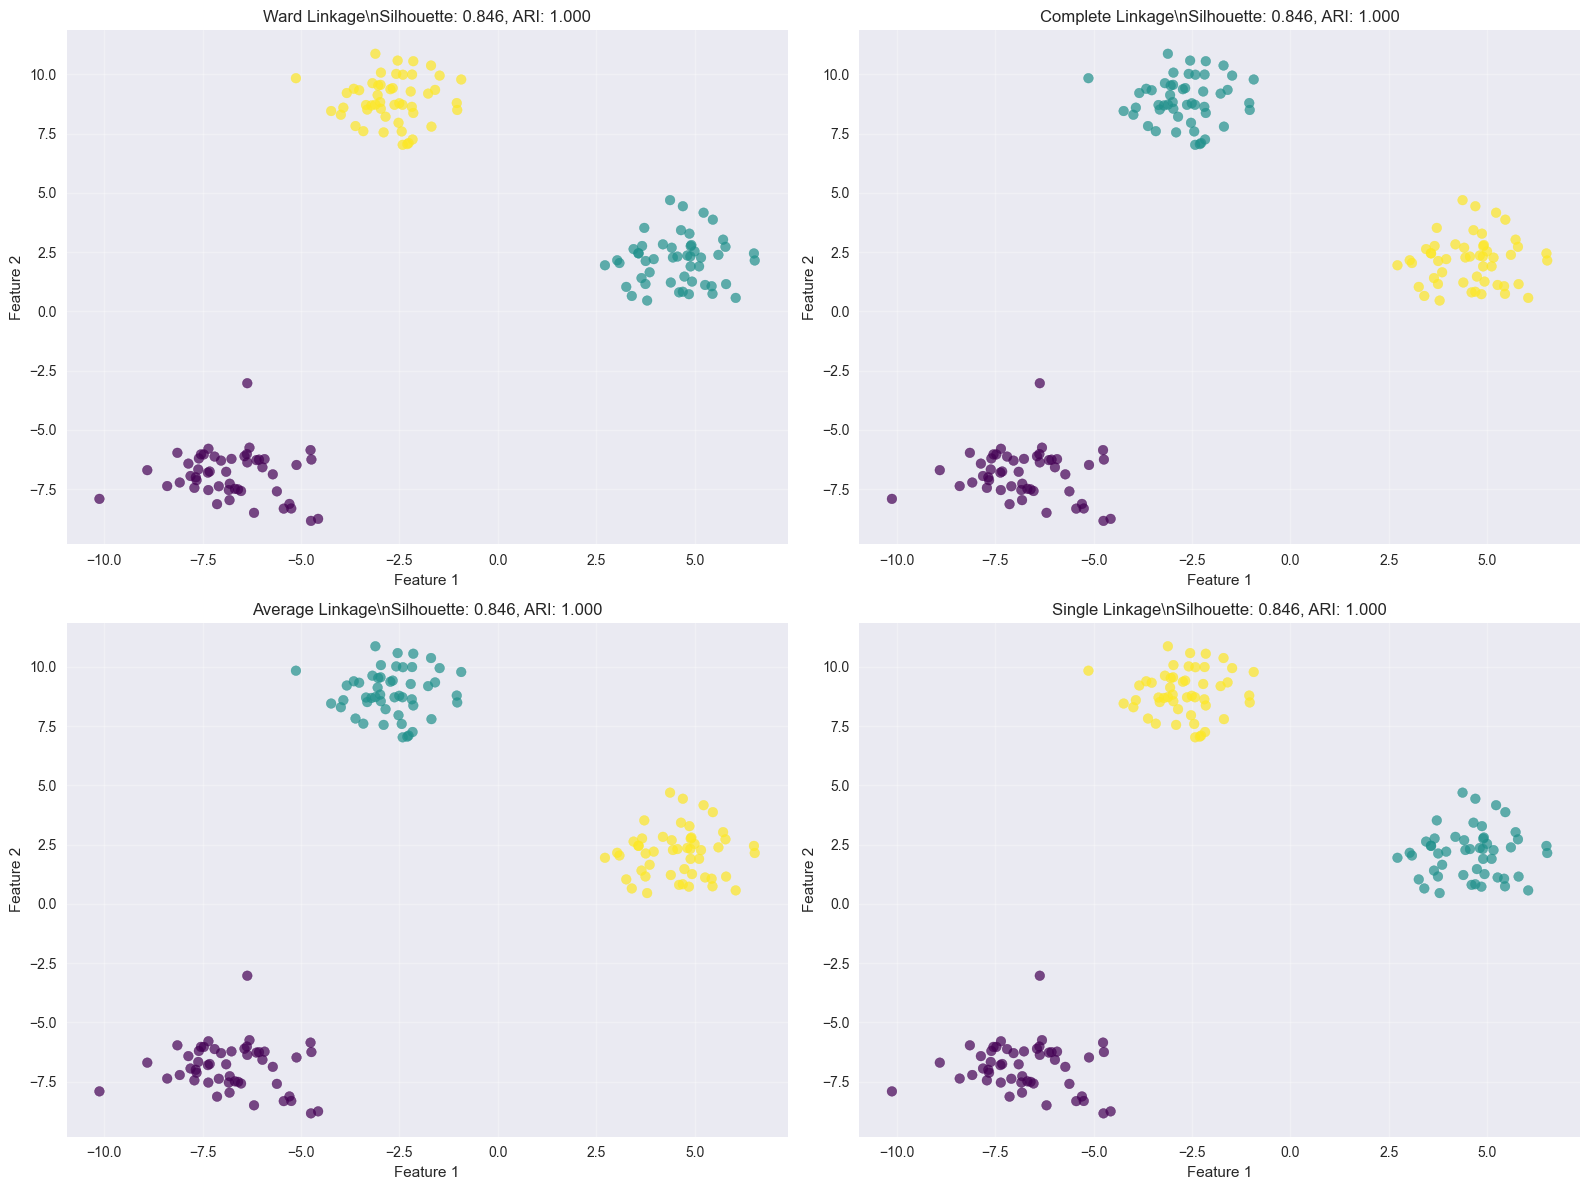

\nLinkage Methods Comparison / Porównanie metod łączenia:
  Method  Silhouette_Score  ARI_Score
    Ward            0.8461     1.0000
Complete            0.8461     1.0000
 Average            0.8461     1.0000
  Single            0.8461     1.0000


In [3]:
# Create dendrograms for different linkage methods / Tworzenie dendrogramów dla różnych metod łączenia
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Store linkage matrices for later use / Przechowywanie macierzy łączenia do późniejszego użycia
linkage_matrices = {}

for i, method in enumerate(linkage_methods):
    # Calculate linkage matrix / Obliczenie macierzy łączenia
    if method == 'ward':
        # Ward method requires euclidean distance / Metoda Ward wymaga odległości euklidesowej
        linkage_matrix = linkage(X_scaled, method=method)
    else:
        linkage_matrix = linkage(X_scaled, method=method, metric='euclidean')
    
    linkage_matrices[method] = linkage_matrix
    
    # Create dendrogram / Tworzenie dendrogramu
    dendrogram(linkage_matrix, ax=axes[i], truncate_mode='level', p=5)
    axes[i].set_title(f'Dendrogram - {method.capitalize()} Linkage\\nDendrogram - łączenie {method}')
    axes[i].set_xlabel('Sample Index or (Cluster Size)')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Compare clustering results for different linkage methods / Porównanie wyników klasteryzacji
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

results_comparison = []

for i, method in enumerate(linkage_methods):
    # Perform agglomerative clustering / Wykonanie klasteryzacji aglomeracyjnej
    if method == 'ward':
        agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    
    labels = agg_clustering.fit_predict(X_scaled)
    
    # Calculate metrics / Obliczenie metryk
    silhouette_avg = silhouette_score(X_scaled, labels)
    ari_score = adjusted_rand_score(y_true, labels)
    
    results_comparison.append({
        'Method': method.capitalize(),
        'Silhouette_Score': silhouette_avg,
        'ARI_Score': ari_score
    })
    
    # Plot clustering results / Wykres wyników klasteryzacji
    scatter = axes[i].scatter(X_sample[:, 0], X_sample[:, 1], c=labels, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'{method.capitalize()} Linkage\\nSilhouette: {silhouette_avg:.3f}, ARI: {ari_score:.3f}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display comparison results / Wyświetlenie wyników porównania
comparison_df = pd.DataFrame(results_comparison)
print("\\nLinkage Methods Comparison / Porównanie metod łączenia:")
print("=" * 60)
print(comparison_df.to_string(index=False, float_format='%.4f'))


# **Hierarchical Clustering**  
### *Klasteryzacja hierarchiczna*

---

## **English**

Hierarchical clustering creates a tree-like structure (dendrogram) of clusters by iteratively merging or splitting clusters. There are two main approaches: agglomerative (bottom-up) and divisive (top-down). The most common is agglomerative clustering, which starts with individual points and merges them into larger clusters.

### **Key Concepts**

1. **Dendrogram**: Tree-like diagram showing cluster hierarchy
2. **Linkage Criteria**: Methods to measure distance between clusters
3. **Agglomerative**: Bottom-up approach (merge clusters)
4. **Divisive**: Top-down approach (split clusters)
5. **Distance Matrix**: Pairwise distances between all data points

### **Algorithm Steps (Agglomerative)**

1. **Initialize**: Each data point as its own cluster
2. **Calculate Distance Matrix**: Compute pairwise distances between all clusters
3. **Find Closest Pair**: Identify two closest clusters
4. **Merge Clusters**: Combine the closest clusters into one
5. **Update Distance Matrix**: Recalculate distances to the new cluster
6. **Repeat**: Until all points are in one cluster or desired number reached

### **Linkage Criteria**

#### **Single Linkage (Minimum)**
Distance between closest points in different clusters:
$$
d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y)
$$

#### **Complete Linkage (Maximum)**
Distance between farthest points in different clusters:
$$
d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y)
$$

#### **Average Linkage**
Average distance between all pairs of points:
$$
d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)
$$

#### **Ward Linkage**
Minimizes within-cluster sum of squares:
$$
d(C_i, C_j) = \sqrt{\frac{2|C_i||C_j|}{|C_i| + |C_j|}} \|\mu_i - \mu_j\|
$$

### **Distance Metrics**

#### **Euclidean Distance**
$$
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

#### **Manhattan Distance**
$$
d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$

#### **Cosine Distance**
$$
d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
$$

### **Advantages**
- **No need to specify number of clusters beforehand**
- **Deterministic results** (same input always gives same output)
- **Hierarchical structure** provides insights into data organization
- **Works with any distance metric**
- **Can capture nested cluster structures**

### **Disadvantages**
- **Computational complexity**: O(n³) for naive implementation
- **Sensitive to noise and outliers**
- **Difficulty handling large datasets**
- **Once merged, clusters cannot be split** (in agglomerative)
- **Choice of linkage criterion affects results significantly**

### **Linkage Comparison**

| Linkage | Cluster Shape | Noise Sensitivity | Use Case |
|---------|---------------|-------------------|----------|
| **Single** | Elongated | High | Chain-like structures |
| **Complete** | Compact | Low | Well-separated clusters |
| **Average** | Moderate | Medium | General purpose |
| **Ward** | Spherical | Low | Similar-sized clusters |

### **Choosing Number of Clusters**

1. **Visual Inspection**: Look at dendrogram for natural cuts
2. **Elbow Method**: Plot within-cluster sum of squares
3. **Silhouette Analysis**: Measure cluster quality
4. **Gap Statistic**: Compare with random data

### **Applications**
- **Phylogenetic Analysis**: Evolutionary relationships
- **Market Segmentation**: Customer grouping
- **Image Segmentation**: Pixel grouping in images
- **Gene Expression**: Grouping genes with similar expression
- **Social Network Analysis**: Community detection

### **Computational Complexity**

- **Naive Implementation**: O(n³)
- **Optimized Algorithms**: O(n² log n) using priority queues
- **Memory Requirements**: O(n²) for distance matrix

---

## **Polish**

Klasteryzacja hierarchiczna tworzy strukturę drzewiastą (dendrogram) klastrów poprzez iteracyjne łączenie lub dzielenie klastrów. Istnieją dwa główne podejścia: aglomeracyjne (od dołu do góry) i dzielące (od góry do dołu). Najczęściej stosowane jest grupowanie aglomeracyjne, które zaczyna od pojedynczych punktów i łączy je w większe klastry.

### **Kluczowe pojęcia**

1. **Dendrogram**: Diagram drzewiasty pokazujący hierarchię klastrów
2. **Kryteria łączenia**: Metody mierzenia odległości między klastrami
3. **Aglomeracyjne**: Podejście od dołu do góry (łączenie klastrów)
4. **Dzielące**: Podejście od góry do dołu (dzielenie klastrów)
5. **Macierz odległości**: Odległości parami między wszystkimi punktami danych

### **Kroki algorytmu (aglomeracyjny)**

1. **Inicjalizacja**: Każdy punkt danych jako własny klaster
2. **Obliczenie macierzy odległości**: Obliczenie odległości parami między wszystkimi klastrami
3. **Znajdowanie najbliższej pary**: Identyfikacja dwóch najbliższych klastrów
4. **Łączenie klastrów**: Połączenie najbliższych klastrów w jeden
5. **Aktualizacja macierzy odległości**: Przeliczenie odległości do nowego klastra
6. **Powtarzanie**: Aż wszystkie punkty będą w jednym klastrze lub osiągnięto pożądaną liczbę

### **Kryteria łączenia**

#### **Łączenie pojedyncze (minimum)**
Odległość między najbliższymi punktami w różnych klastrach:
$$
d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y)
$$

#### **Łączenie kompletne (maksimum)**
Odległość między najdalszymi punktami w różnych klastrach:
$$
d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y)
$$

#### **Łączenie średnie**
Średnia odległość między wszystkimi parami punktów:
$$
d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)
$$

#### **Łączenie Warda**
Minimalizuje sumę kwadratów wewnątrz klastra:
$$
d(C_i, C_j) = \sqrt{\frac{2|C_i||C_j|}{|C_i| + |C_j|}} \|\mu_i - \mu_j\|
$$

### **Metryki odległości**

#### **Odległość euklidesowa**
$$
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

#### **Odległość Manhattan**
$$
d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$

#### **Odległość cosinusowa**
$$
d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
$$

### **Zalety**
- **Brak potrzeby wcześniejszego określania liczby klastrów**
- **Deterministyczne wyniki** (te same dane zawsze dają ten sam wynik)
- **Struktura hierarchiczna** zapewnia wgląd w organizację danych
- **Działa z dowolną metryką odległości**
- **Może uchwycić zagnieżdżone struktury klastrów**

### **Wady**
- **Złożoność obliczeniowa**: O(n³) dla naiwnej implementacji
- **Wrażliwość na szum i wartości odstające**
- **Trudność obsługi dużych zbiorów danych**
- **Po połączeniu klastry nie mogą być rozdzielone** (w aglomeracyjnym)
- **Wybór kryterium łączenia znacząco wpływa na wyniki**

### **Porównanie łączeń**

| Łączenie | Kształt klastra | Wrażliwość na szum | Przypadek użycia |
|----------|-----------------|-------------------|------------------|
| **Pojedyncze** | Wydłużone | Wysoka | Struktury łańcuchowe |
| **Kompletne** | Kompaktowe | Niska | Dobrze oddzielone klastry |
| **Średnie** | Umiarkowane | Średnia | Ogólne zastosowanie |
| **Ward** | Sferyczne | Niska | Klastry podobnej wielkości |

### **Wybór liczby klastrów**

1. **Wizualna inspekcja**: Spojrzenie na dendrogram dla naturalnych cięć
2. **Metoda łokcia**: Wykres sumy kwadratów wewnątrz klastra
3. **Analiza sylwetki**: Pomiar jakości klastra
4. **Statystyka Gap**: Porównanie z danymi losowymi

### **Zastosowania**
- **Analiza filogenetyczna**: Relacje ewolucyjne
- **Segmentacja rynku**: Grupowanie klientów
- **Segmentacja obrazów**: Grupowanie pikseli w obrazach
- **Ekspresja genów**: Grupowanie genów o podobnej ekspresji
- **Analiza sieci społecznych**: Wykrywanie społeczności

### **Złożoność obliczeniowa**

- **Naiwna implementacja**: O(n³)
- **Algorytmy zoptymalizowane**: O(n² log n) używając kolejek priorytetowych
- **Wymagania pamięciowe**: O(n²) dla macierzy odległości
